# D213 Task 1 Advanced Data Analytics

## Part 1
### A1: Research Question

Given daily hospital revenue data can we detect seasonality and make future forecasts with a statistically significant level of confidence? 

### A2: Objectives

Given the business problem of hospital readmission's along with a time series data set related to hospital revenue our primary objective to gain insights into the overall trends and seasonality of the hospital revenue. These insights while not directly related readmission will give us another feature in future study of readmission data. A secondary objective of this analysis is to assess the feasibility of forcasting hospital revenue based on the given time series. The potential to forcast revenue has a broad range of applications ranging from further study of readmission data as well as organizational resource planning.

## Part 2

### B1: Assumptions

- Autocorrelation: #TODO

- Stationarity: The assumption requires that the statistical characteristics of the data remain constant over the passing of time. This means that measures such as the autocorrelation, variance, and mean should remain consistent throughout the data set. If the data does not satisfy this assumption it must be remedied before moving forward with the application of the model.

- No seasonality: #TODO

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('./medical_data.csv')
data_base = df.copy()

df.head()

,Day,Revenue
0,1,0.000000
1,2,-0.292356
2,3,-0.327772
3,4,-0.339987
4,5,-0.124888


In [3]:
df.shape

(731, 2)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,731.0,366.000000,211.165812,1.000000,183.500000,366.00000,548.500000,731.000000
Revenue,731.0,14.179608,6.959905,-4.423299,11.121742,15.95183,19.293506,24.792249


In [5]:
days = set(df["Day"])
for i in range(1, len(df) + 1 ):
    if i not in days:
        print(i)

## C1:

<Axes: title={'center': 'Medical Admissions Revenue'}, xlabel='Day', ylabel='Revenue (millions)'>

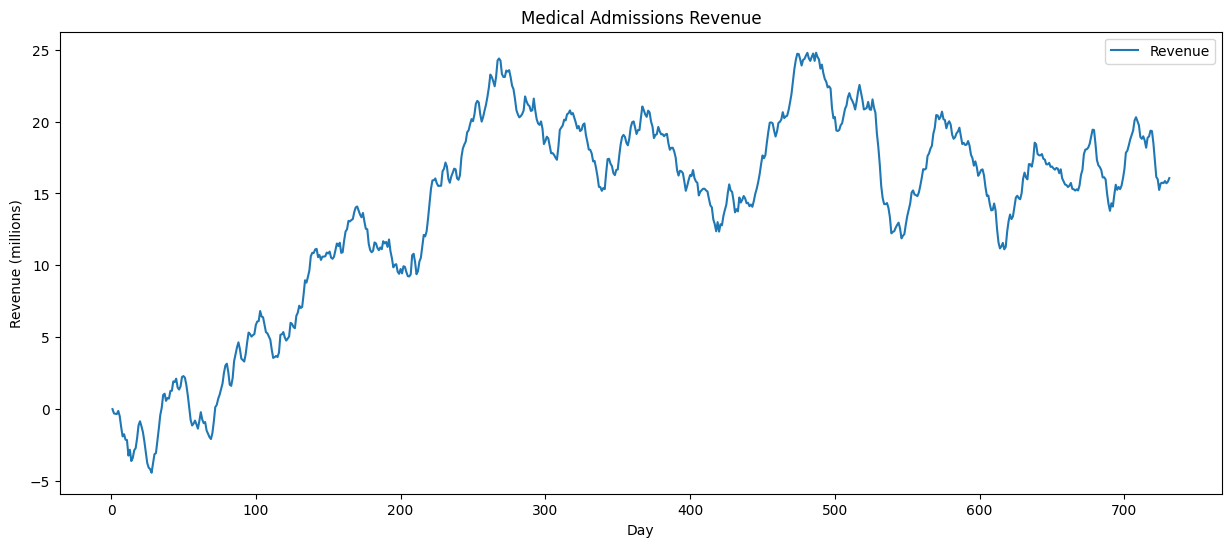

In [6]:
df = df.set_index('Day')
df.plot(title='Medical Admissions Revenue', ylabel='Revenue (millions)', xlabel='Day', figsize=(15, 6))

<Axes: title={'center': 'Medical Admissions Revenue'}, xlabel='Day', ylabel='Revenue (millions)'>

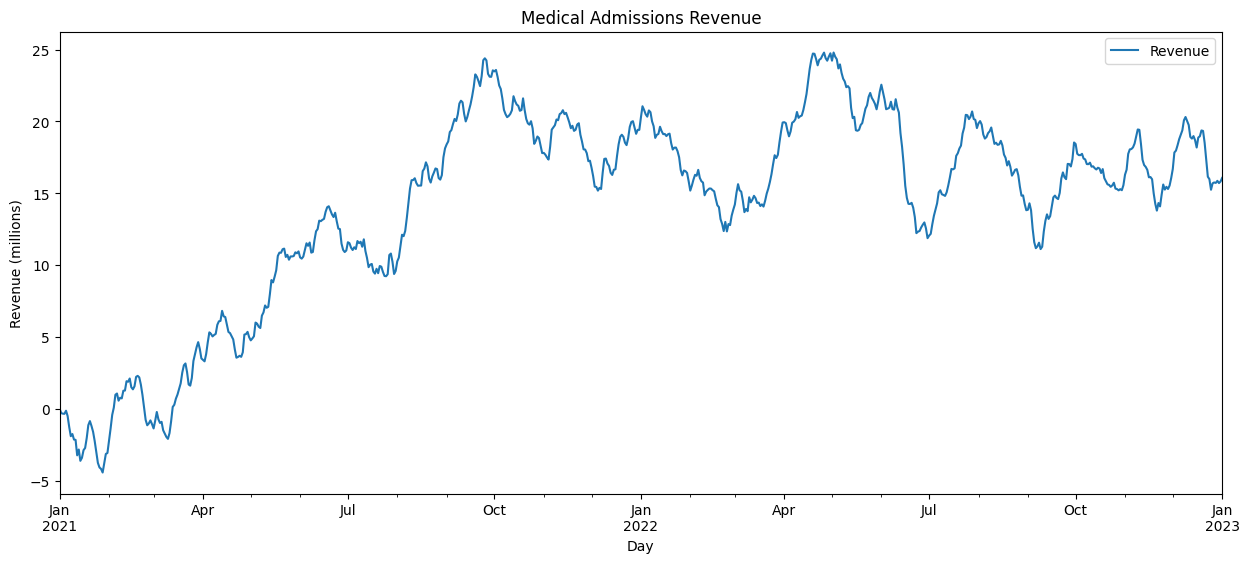

In [7]:
# Set index as a date range
date_range = pd.date_range(start='2021-1-1', periods=len(df), freq='D')
df = df.set_index(date_range)
df.plot(title='Medical Admissions Revenue', ylabel='Revenue (millions)', xlabel='Day', figsize=(15, 6))

## C2:

## C3:

<Axes: >

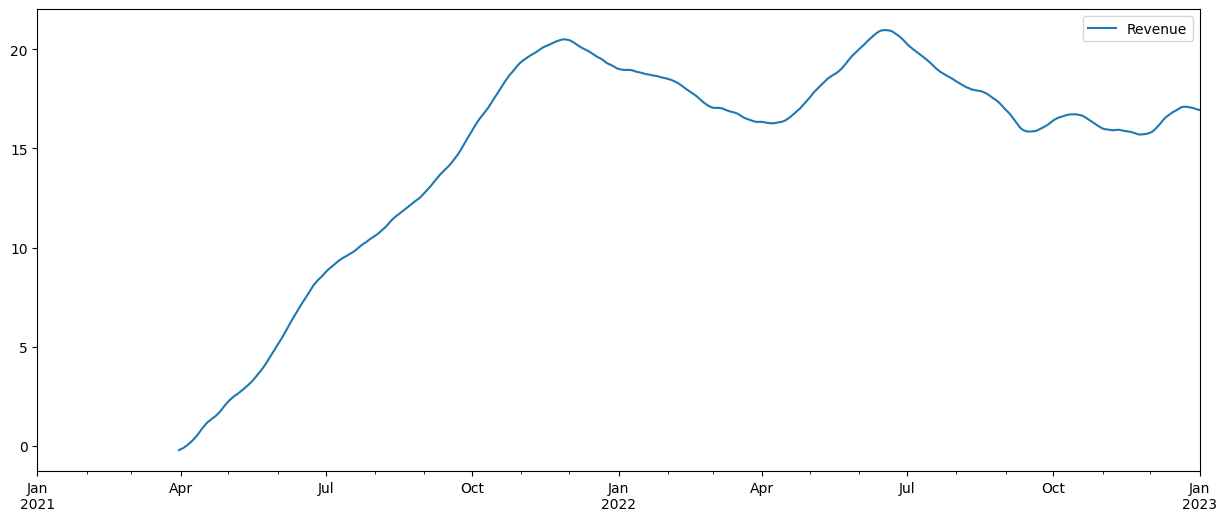

In [8]:
# Visual Inspection
df.rolling(window=90).mean().plot(figsize=(15, 6))

In [9]:
# Dicky Fuller Test
result = adfuller(df['Revenue'])
print("✅ Data is stationary") if result[1] <= 0.05 else  print("🔺 Data is not stationary")
print('ADF statistic:', result[0])
print('p-value:', result[1])
print('critical values:', result[4])


🔺 Data is not stationary
ADF statistic: -2.218319047608946
p-value: 0.19966400615064328
critical values: {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}


<Axes: title={'center': 'Diffed Revenue'}, xlabel='Days', ylabel='Revenue (millions)'>

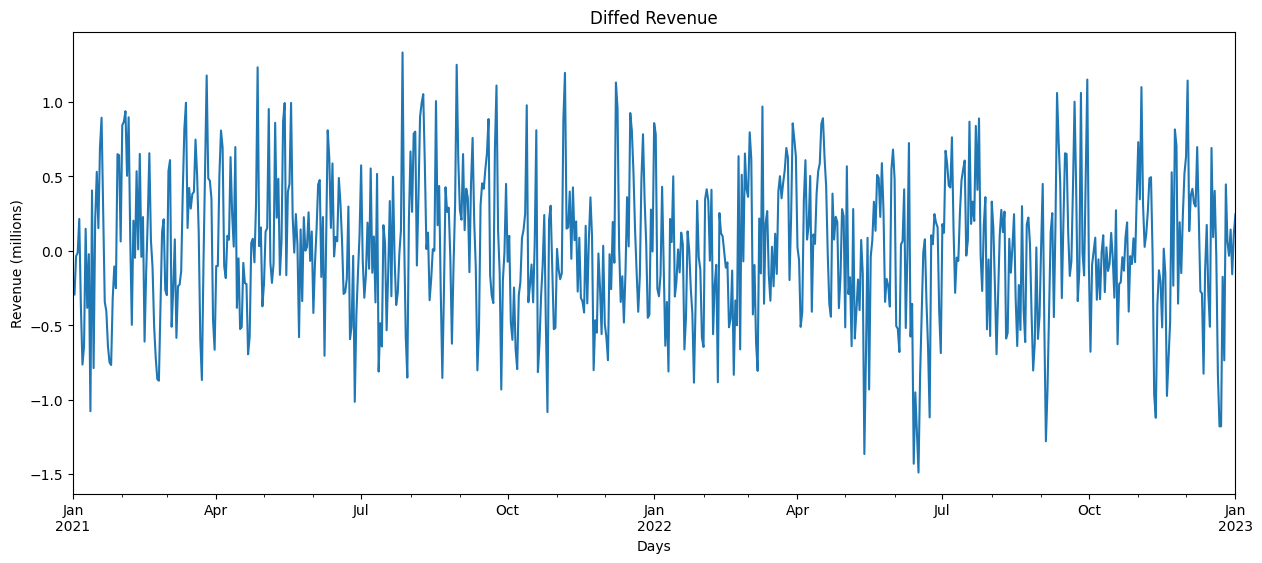

In [10]:
# Difference the time series and plot to line graph
df['Revenue_d'] = df['Revenue'].diff()
df['Revenue_d'].plot(title='Diffed Revenue', ylabel='Revenue (millions)', xlabel='Days', figsize=(15, 6))

In [11]:
result = adfuller(df['Revenue_d'].dropna())
print("✅ Data is stationary") if result[1] <= 0.05 else  print("🔺Data is not stationary")
print('ADF statistic:', result[0])
print('p-value:', result[1])
print('critical values:', result[4])

✅ Data is stationary
ADF statistic: -17.374772303557066
p-value: 5.113206978840171e-30
critical values: {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}


## C4

## C5.

In [12]:
type(df)

pandas.core.frame.DataFrame

<Figure size 150000x600 with 0 Axes>

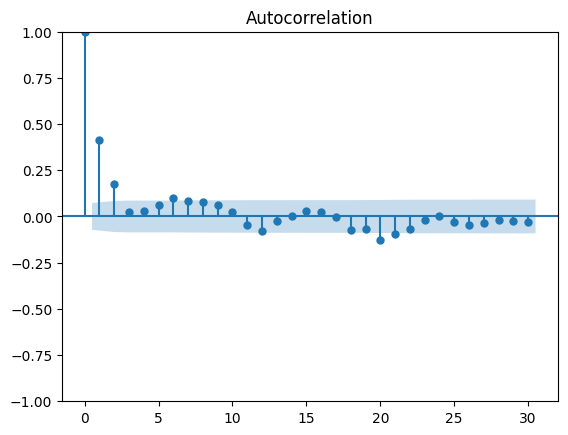

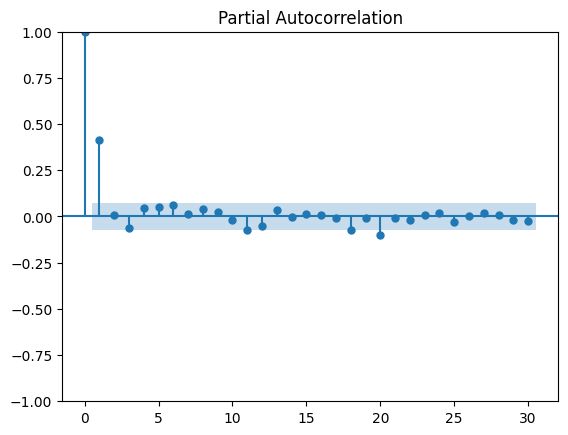

In [13]:
plt.figure(figsize=(1500, 6))
plot_acf(df["Revenue_d"].dropna(), lags=30)
plot_pacf(df["Revenue_d"].dropna(), lags=30)
plt.show()

In [14]:
model = SARIMAX(df["Revenue"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit(disp=False)

In [15]:
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                  731
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -455.922
Date:                            Sat, 16 Sep 2023   AIC                            921.843
Time:                                    10:14:58   BIC                            944.726
Sample:                                01-01-2021   HQIC                           930.678
                                     - 01-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4350      0.085      5.129      0.000       0.269       0.601
ma.L1         -0.0210      0.094   